# **Project 2 - FasTag Fraud Detection**
## **Contents**
* [Introduction](#Introduction)
  * [Context](#Context)
  * [Python Libraries](#Python-Libraries)
  * [Data Source](#Data-Source)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Data Importation](#Data-Importation)
  * [Data Conversion](#Data-Conversion)
  * [Data Cleaning](#Data-Cleaning)
  * [Numerical Variable Exploration](#Numerical-Variable-Exploration)
  * [Non-Numerical Variable Exploration](#Non-Numerical-Variable-Exploration)
  * [Summary](#Summary)
* [Feature Engineering](#Feature-Engineering)
* [Data Preprocessing](#Data-Preprocessing)
* [Machine Learning Model Development](#Machine-Learning-Model-Development)
* [Model Evaluation](#Model-Evaluation)
* [Recommendation](#Recommendation)
* [Conclusion](#Conclusion)

## **Introduction**
### **Context**
The purpose of this project is to detect fraudulent FasTag transactions from a given dataset. The approach taken in this project is to analyse the dataset and prepare it for the implementation of several machine learning models in order to predict the response variable (i.e. whether or not a given FasTag transaction is fraudulent) from one or several carefully chosen explanatory variables. Next, each of the machine learning models implemented will be evaluated using a set of chosen metrics. Finally an ensemble method will be used to gather incorportate each of the chosen models in the same workflow.

### **Python Libraries**
In order to begin this project, the following Python libraries are imported, with the following justifications:
* `numpy`, for numerical calculations;
* `pandas`, for data analysis;
* `matplotlib.pyplot`, for data visualisation;
* `seaborn`, for data visualisation;
* `sklearn.preprocessing`, for preprocessing the dataset, especially via the `StandardScaler` module;
* `sklearn.model_selection`, for model selection, specifically via the `train_test_split` module;
* `sklearn.linear_model`, for using linear models, especially via the `LogisticRegression` module;
* `sklearn.tree`, for using tree models, especially via the `DecisionTreeClassifier` module;
* `sklearn.ensemble`, for using ensemble methods, especially via the `RandomForestClassifier`, `VotingClassifier` and `BaggingClassifier` modules;
* `sklearn.svm`, for using support vector machines, especially via the `SVC` module, and;
* `sklearn.metrics`, for model evaluation, especially through the `accuracy_score`, `f1_score`, `precision_score` and `recall_score` modules.

The Python code used to import all of the above-mentioned Python libraries is given in the code cell below. Additional care has been exercised in order to use a random seed value for code reproducibility and a plot style for aesthetics.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Set a random seed value for code reproducibility
np.random.seed(42)

# Set a plot style for aesthetics
palette = sns.color_palette("viridis_r", as_cmap = True)
sns.set_style(style = "whitegrid", rc = {"font.family":"Times New Roman", "font.weight":"bold"})

# Suppress unimportant warinings
wrn.filterwarnings(category = FutureWarning, action = 'ignore')
wrn.filterwarnings(category = UserWarning, action = 'ignore')

### **Data Source**
The dataset in question is contained in the `fastag-fraud-detection.csv` file, located in the current directory. The Python code used to import the dataset is given in the code cell below. The first few rows of the dataset are also shown.

## **Exploratory Data Analysis**
The Exploratory Data Analysis step is, in this project, divided into six further steps:
1) **Data Importing:** In this step, the dataset is imported from the data source.
2) **Data Cleaning:** In this step, the dataset is cleaned. In particular, missing values and outliers are addressed, inconsistencies in the dataset are rectified, and all of the variables in the dataset are reformatted so as to appear in the right format.
3) **Data Conversion:** In this step, all variables in the dataset are converted to the appropriate data type.
4) **Numerical Variable Exploration:** In this step, the general distributions and linear relationships between numerical variables is explored, so as to better understand the dataset and its contents, as well as if there are any important relationships between numerical variables that can be of interest in building a predicitive model, later on.
5) **Non-Numerical Variable Exploration:** In this step, the previous step is repeating, only this time controlling for specific values of the different non-numerical variables, so as to better understand the dataset and its contents, as well as if there are any important relationships between numerical and non-numerical variables that can be of interest in building a predictive model, later on.
6) **Summary:** In this step, all of the above steps are summarised, especially the key findings uncovered that will be important to use, when building a predictive model, later on.

The above mentioned steps are undertaken in what follows.

### **Data Importation**
As mentioned, in this step, the dataset is imported from the data source. The Python code to accomplish this is given in the code cell below. The first few rows of the dataset are also displayed.

In [2]:
# Import the dataset
df = pd.read_csv("fastag.csv")

# Display the first few rows of the dataset
df.head()

,TRANSACTION ID,TIMESTAMP,VEHICLE TYPE,FASTAG ID,TOLL BOOTH ID,LANE TYPE,VEHICLE DIMENSIONS,TRANSACTION AMOUNT,AMOUNT PAID,GEOGRAPHICAL LOCATION,VEHICLE SPEED,VEHICLE PLATE NUMBER,FRAUD INDICATOR
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


### **Data Cleaning**
As mentioned, in this step, the dataset is cleaned. In particular, missing values and outliers are addressed, and any inconsistencies in the dataset are rectified. The Python code to accomplish this is given in the code cell below.

In [3]:
# Determine whether or not missing values should be removed (i.e. if they make up less than 5% of the dataset)
print(f"""Total number of rows in the dataset: {df.shape[0]}
Total number of missing values in the dataset: {df.isna().sum().sum()}
Missing values make up less than 5% of the dataset: {df.isna().sum().sum() / df.shape[0] < 0.05}"""
)

Total number of rows in the dataset: 5000
Total number of missing values in the dataset: 549
Missing values make up less than 5% of the dataset: False


Since rows with missing values account for more than 5% of the dataset, they will not be removed. They will be dealt with later on. They are further dealt with as follows:

In [4]:
# Determine the number of missing values present in each column
df.isna().sum()

TRANSACTION ID             0
TIMESTAMP                  0
VEHICLE TYPE               0
FASTAG ID                549
TOLL BOOTH ID              0
LANE TYPE                  0
VEHICLE DIMENSIONS         0
TRANSACTION AMOUNT         0
AMOUNT PAID                0
GEOGRAPHICAL LOCATION      0
VEHICLE SPEED              0
VEHICLE PLATE NUMBER       0
FRAUD INDICATOR            0
dtype: int64

It seems only one column has missing values at all: The `FASTAG ID` column. It is further investigated as follows:

In [5]:
print(
    f"""Number of rows in the dataset: {df.shape[0]}
Number of distinct values in the FASTAG ID column: {df["FASTAG ID"].nunique()}
Number of missing values in the FASTAG ID column: {df["FASTAG ID"].isna().sum()}
All non-null values in the FASTAG ID column are unique: {df["FASTAG ID"].nunique() + df["FASTAG ID"].isna().sum() == df.shape[0]}"""
)

Number of rows in the dataset: 5000
Number of distinct values in the FASTAG ID column: 4451
Number of missing values in the FASTAG ID column: 549
All non-null values in the FASTAG ID column are unique: True


Thus, given the `FASTAG ID` column is indeed a unique identifier of the FasTag transaction, it is most likely that the missing values in the column are due to data entry errors. Moreover, given that the `TRANSACTION ID` column is also a unique identifier for the `FASTAG ID` column (and has no missing values), it follows that both columns have the same purpose. Thus, the `FASTAG ID` column is not important for the purposes of this project, and will therefore be dropped.

In [6]:
# Drop the FASTAG ID column from the dataset
df.drop(columns = ["FASTAG ID"], inplace = True)

# Print the first few rows of the resulting dataset
df.head()

,TRANSACTION ID,TIMESTAMP,VEHICLE TYPE,TOLL BOOTH ID,LANE TYPE,VEHICLE DIMENSIONS,TRANSACTION AMOUNT,AMOUNT PAID,GEOGRAPHICAL LOCATION,VEHICLE SPEED,VEHICLE PLATE NUMBER,FRAUD INDICATOR
0,1,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


Next, the dataset will be checked for any abnormal outliers in its numerical variables. The Python code to accomplish this is given in the code cell below. 

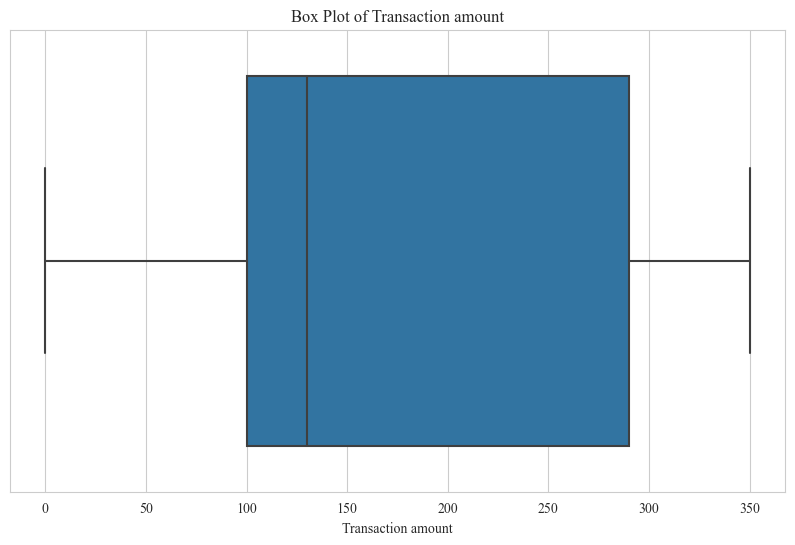

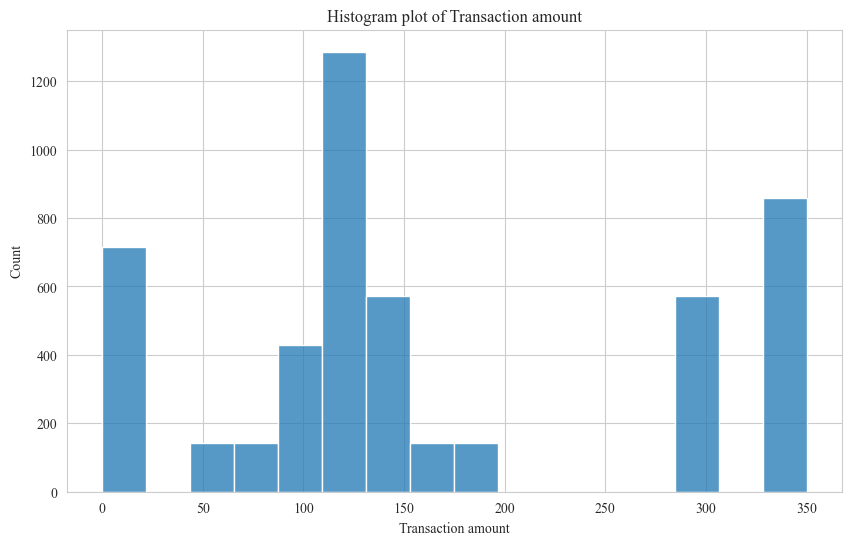

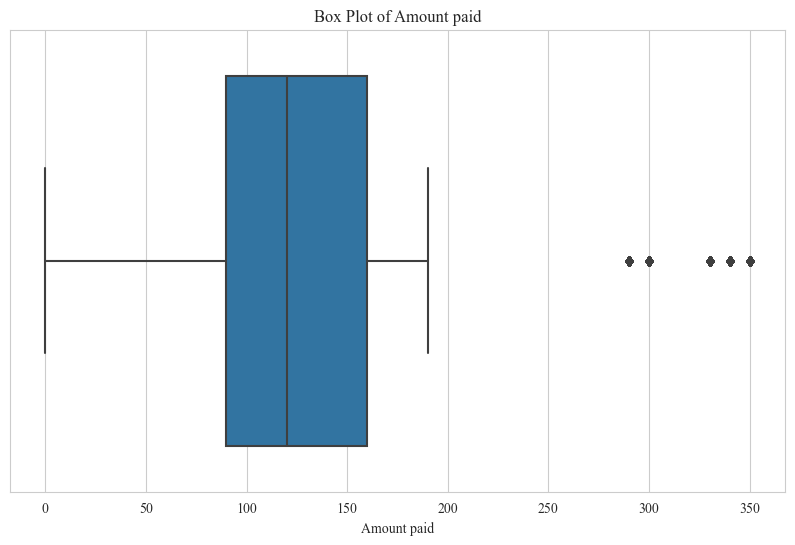

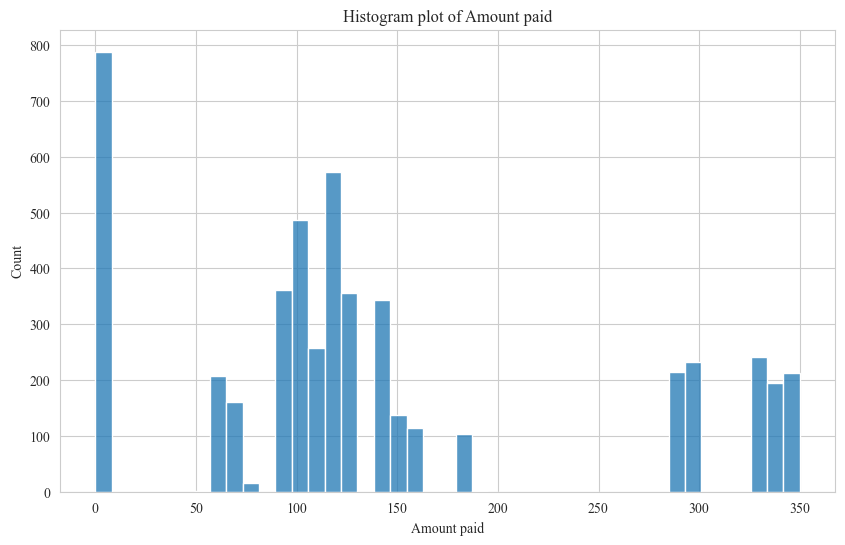

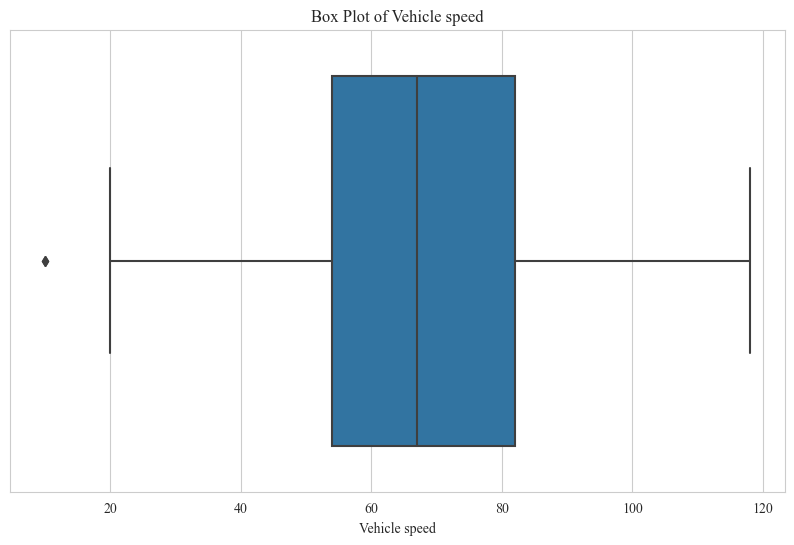

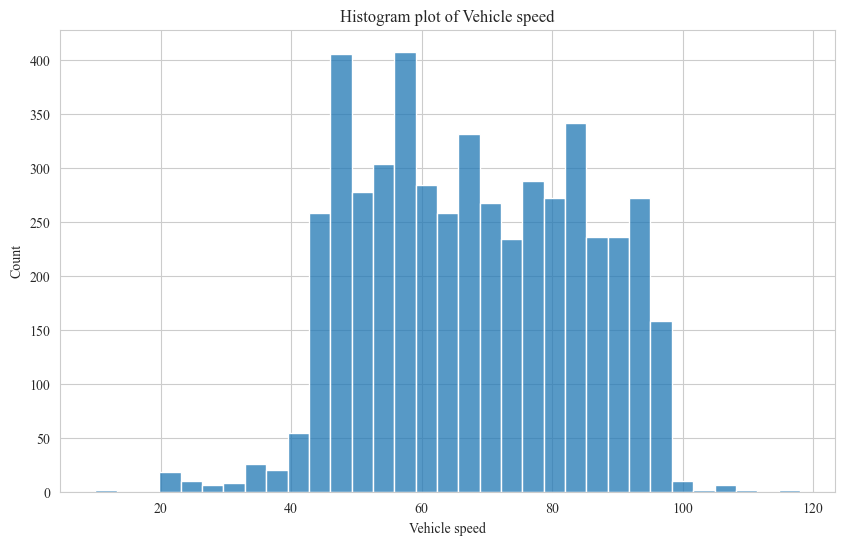

In [7]:
# Create a mask for the dataset's numerical variables
numerical_variables = ["TRANSACTION AMOUNT", "AMOUNT PAID", "VEHICLE SPEED"]

# Check for inconsistencies in the dataset's numerical variables
for x in numerical_variables:
    y = x.capitalize()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.boxplot(data = df, x = x).set(xlabel = y, title = f"Box Plot of {y}")
    plt.show()
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.histplot(data = df, x = x).set(xlabel = y, title = f"Histogram plot of {y}")
    plt.show()

There seem to be no abnormal outliers in the dataset's numerical variables. Even though the `AMOUNT PAID` column does have outliers, they seem to reflect the maximal values of the `TRANSACTION AMOUNT` column. Next, abnormal values will be checked in the dataset's categorical variables. The Python code to accomplish this is given in the code cell below:

In [8]:
# Create a mask for the dataset's non-numerical variables
non_numerical_variables = [x for x in df.columns if not(x in ["TRANSACTION AMOUNT", "AMOUNT PAID", "VEHICLE SPEED"])]

# Check for inconsistencies in the dataset's numerical variables
for x in non_numerical_variables:
    print(f"{(x, df[x].unique(), df[x].nunique())}\n")

('TRANSACTION ID', array([   1,    2,    3, ..., 4998, 4999, 5000], dtype=int64), 5000)

('TIMESTAMP', array(['1/6/2023 11:20', '1/7/2023 14:55', '1/8/2023 18:25', ...,
       '2/5/2023 5:08', '2/20/2023 20:34', '3/10/2023 0:59'], dtype=object), 4423)

('VEHICLE TYPE', array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object), 7)

('TOLL BOOTH ID', array(['A-101', 'B-102', 'D-104', 'C-103', 'D-105', 'D-106'], dtype=object), 6)

('LANE TYPE', array(['Express', 'Regular'], dtype=object), 2)

('VEHICLE DIMENSIONS', array(['Large', 'Small', 'Medium'], dtype=object), 3)

('GEOGRAPHICAL LOCATION', array(['13.059816123454882, 77.77068662374292',
       '13.042660878688794, 77.47580097259879',
       '12.84197701525119, 77.67547528176169',
       '12.936687032945434, 77.53113977439017',
       '13.21331620748757, 77.55413526894684'], dtype=object), 5)

('VEHICLE PLATE NUMBER', array(['KA11AB1234', 'KA66CD5678', 'KA88EF9012', ..., 'KA33WX6789',
       'KA35YZ0123'

There seem to be no inconsistencies in the dataset's non-numerical variables.

### **Data Conversion**
As mentioned, in this step, all of the variables of the dataset are converted to the right data type. The Python code to accomplish this is given in the code cell below. For contrast, the data types before and after the data conversion step are also displayed.

In [9]:
# Display the dataset's data types
df.dtypes

TRANSACTION ID            int64
TIMESTAMP                object
VEHICLE TYPE             object
TOLL BOOTH ID            object
LANE TYPE                object
VEHICLE DIMENSIONS       object
TRANSACTION AMOUNT        int64
AMOUNT PAID               int64
GEOGRAPHICAL LOCATION    object
VEHICLE SPEED             int64
VEHICLE PLATE NUMBER     object
FRAUD INDICATOR          object
dtype: object

In [10]:
# Convert all of the variables of the dataset to the right datatype
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])
df["TRANSACTION AMOUNT"] = df["TRANSACTION AMOUNT"].astype("float64")
df["AMOUNT PAID"] = df["AMOUNT PAID"].astype("float64")
df["VEHICLE SPEED"] = df["VEHICLE SPEED"].astype("float64")

# Display the dataset's data types
df.dtypes

TRANSACTION ID                    int64
TIMESTAMP                datetime64[ns]
VEHICLE TYPE                     object
TOLL BOOTH ID                    object
LANE TYPE                        object
VEHICLE DIMENSIONS               object
TRANSACTION AMOUNT              float64
AMOUNT PAID                     float64
GEOGRAPHICAL LOCATION            object
VEHICLE SPEED                   float64
VEHICLE PLATE NUMBER             object
FRAUD INDICATOR                  object
dtype: object

### **Numerical Variable Exploration**
As mentioned, in this step, the general distributions of, as well as the relationships between, different numerical variables, are explored. The Python code used to accomplish this is given in the code cell below:

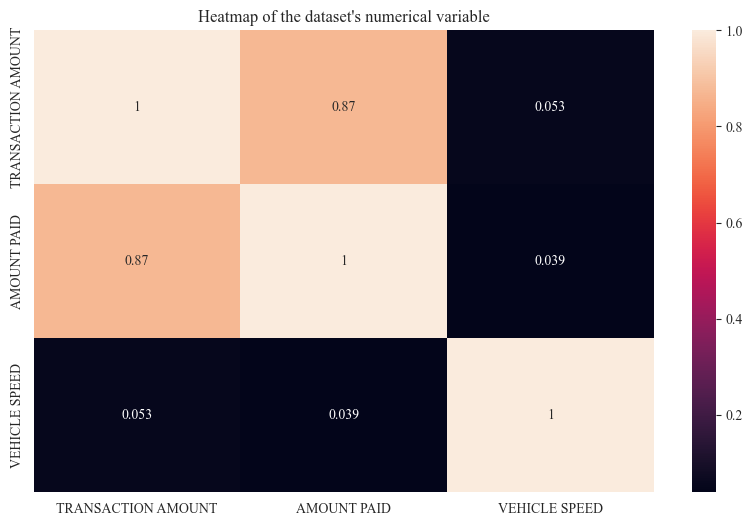

In [11]:
# Generate a subset of the dataset containing only numerical variables
df_numerical_variables = df[numerical_variables]

# Create a correlation matrix between all numerical variables of the dataset
correlation_matrix = df_numerical_variables.corr()

# Display a heatmap of the dataset's correlation matrix between its numerical variables
fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
sns.heatmap(data = correlation_matrix, annot = True).set(title = "Heatmap of the dataset's numerical variable")
plt.show()

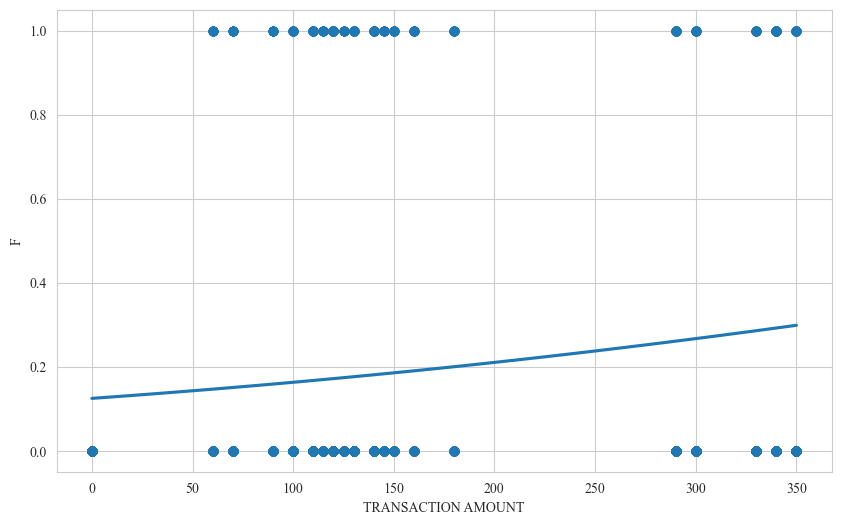

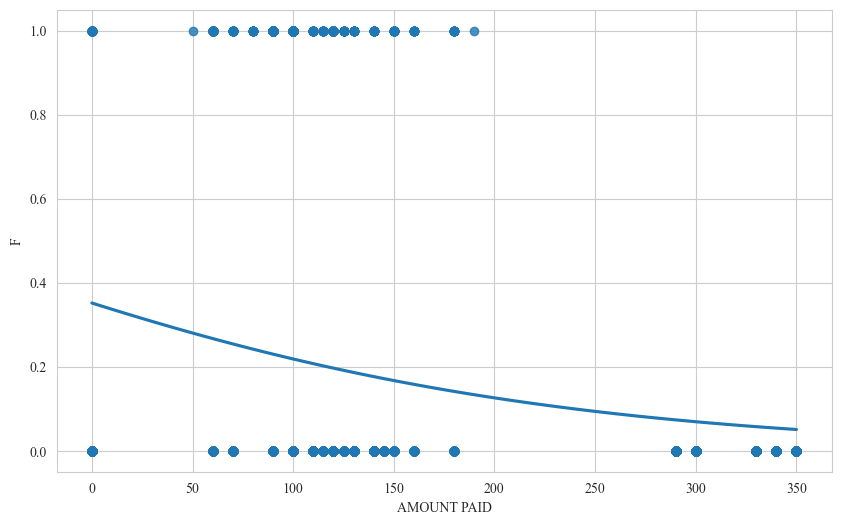

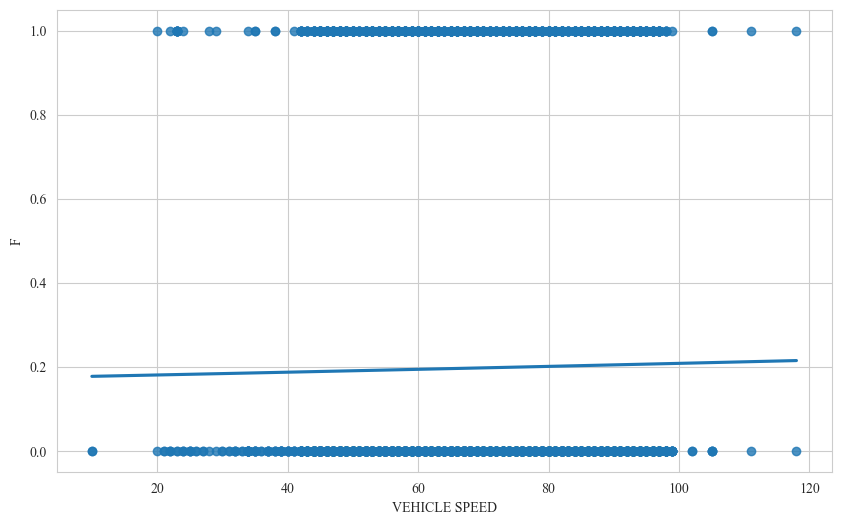

In [12]:
df["F"] = (df["FRAUD INDICATOR"] == "Fraud").astype("int")
for x in numerical_variables:
    fig, ax = plt.subplots(figsize = (10, 6), dpi = 100)
    sns.regplot(data = df, x = x, y = "F", logistic = True, ci = None)
    plt.show()

df.drop(columns = ["F"], inplace = True)

### **Non-Numerical Variable Exploration**
Next the above exploration of the dataset's numerical variables will be repeated, but this time controlling for specific values of the dataset's non-numerical so as to determine if any non-numerical variables have a significant relationship with the numerical variables examined previously. The Python code used to accomplish all of this is given in the code cell below.

In [13]:
df[non_numerical_variables]

,TRANSACTION ID,TIMESTAMP,VEHICLE TYPE,TOLL BOOTH ID,LANE TYPE,VEHICLE DIMENSIONS,GEOGRAPHICAL LOCATION,VEHICLE PLATE NUMBER,FRAUD INDICATOR
0,1,2023-01-06 11:20:00,Bus,A-101,Express,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,B-102,Regular,Small,"13.059816123454882, 77.77068662374292",KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,"13.059816123454882, 77.77068662374292",KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,C-103,Regular,Large,"13.059816123454882, 77.77068662374292",KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,B-102,Express,Medium,"13.059816123454882, 77.77068662374292",KA44IJ6789,Fraud
...,...,...,...,...,...,...,...,...,...
4995,4996,2023-01-01 22:18:00,Truck,C-103,Regular,Large,"13.21331620748757, 77.55413526894684",KA74ST0123,Not Fraud
4996,4997,2023-01-17 13:43:00,Van,B-102,Express,Medium,"13.21331620748757, 77.55413526894684",KA38UV3456,Not Fraud
4997,4998,2023-02-05 05:08:00,Sedan,A-101,Regular,Medium,"13.21331620748757, 77.55413526894684",KA33WX6789,Not Fraud
4998,4999,2023-02-20 20:34:00,SUV,B-102,Express,Large,"13.21331620748757, 77.55413526894684",KA35YZ0123,Not Fraud


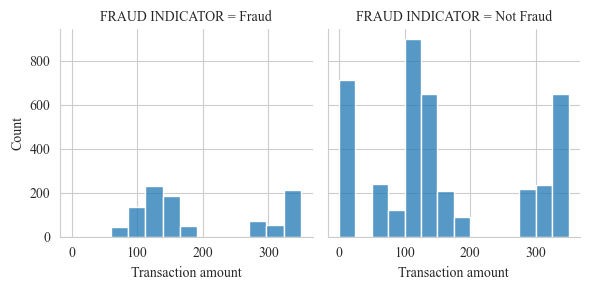

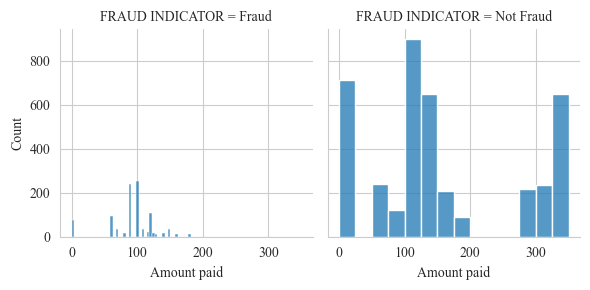

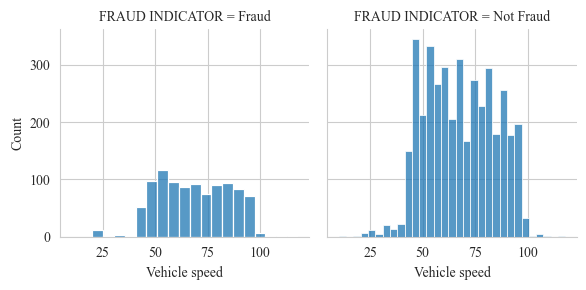

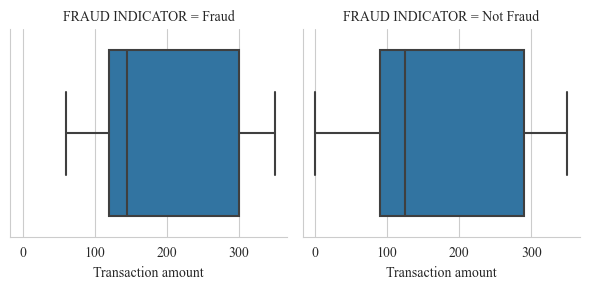

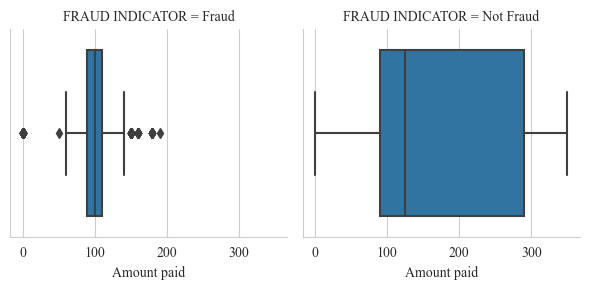

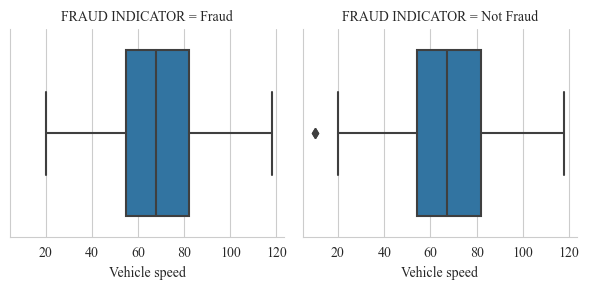

In [14]:
for x in numerical_variables:
    vehicle_grid = sns.FacetGrid(data = df, col = "FRAUD INDICATOR")
    y = x.capitalize()
    vehicle_grid.map(sns.histplot, x).set(xlabel = y)

for x in numerical_variables:
    vehicle_grid = sns.FacetGrid(data = df, col = "FRAUD INDICATOR")
    y = x.capitalize()
    vehicle_grid.map(sns.boxplot, x).set(xlabel = y)

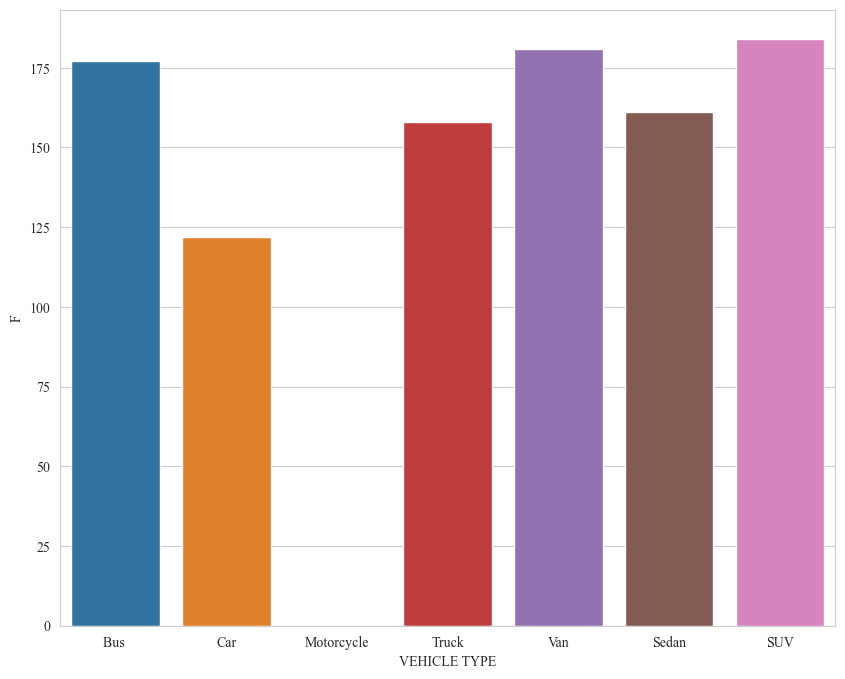

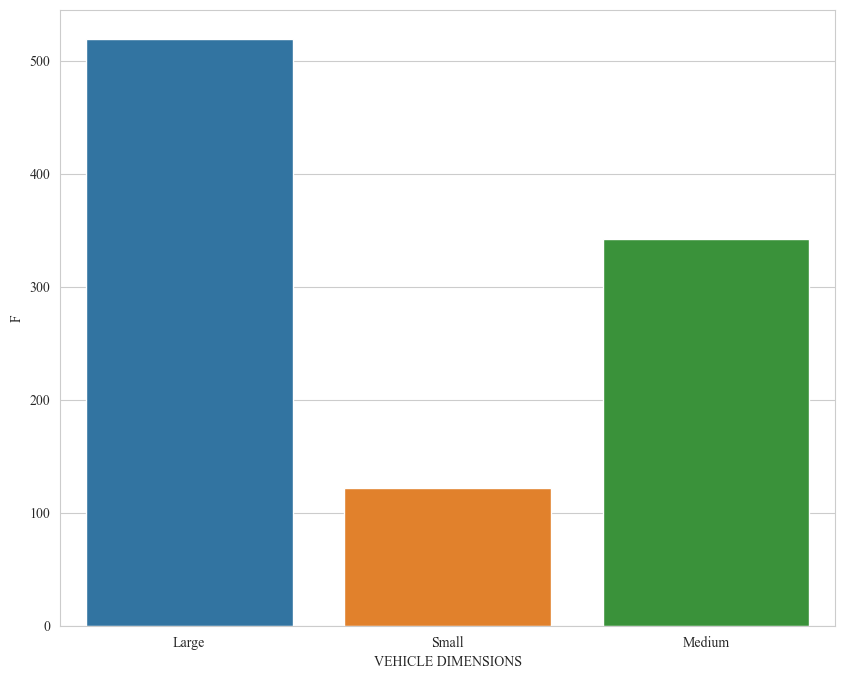

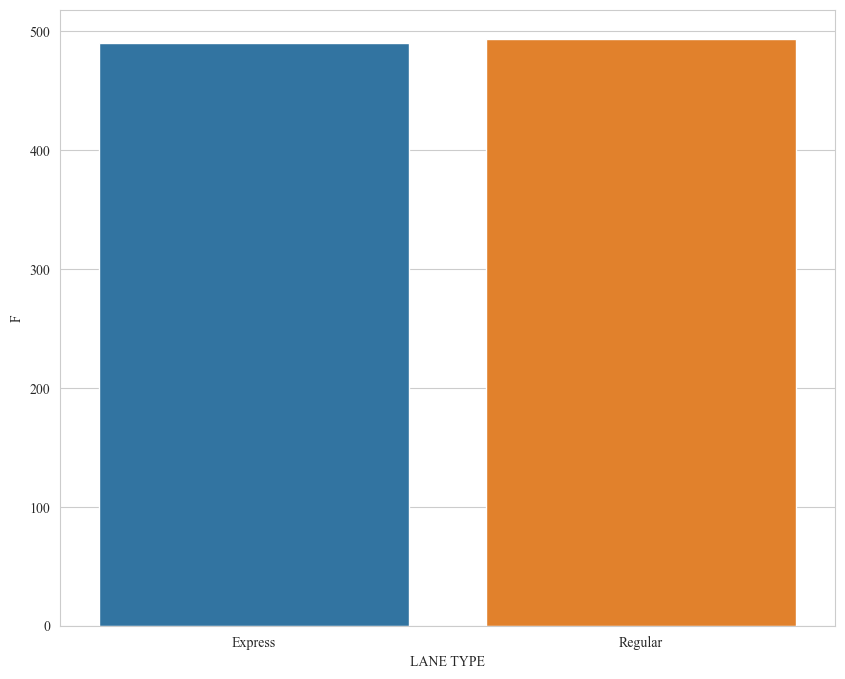

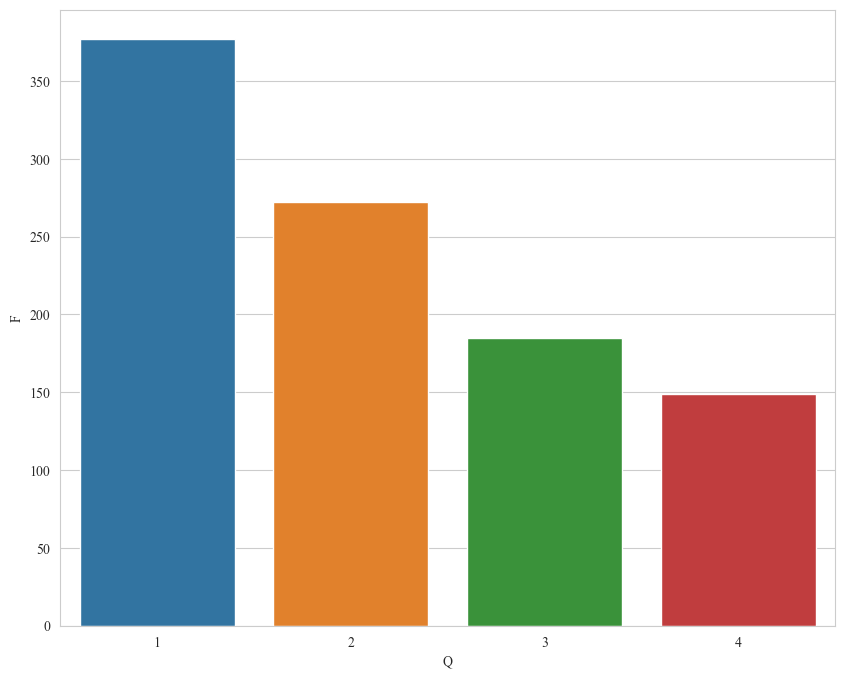

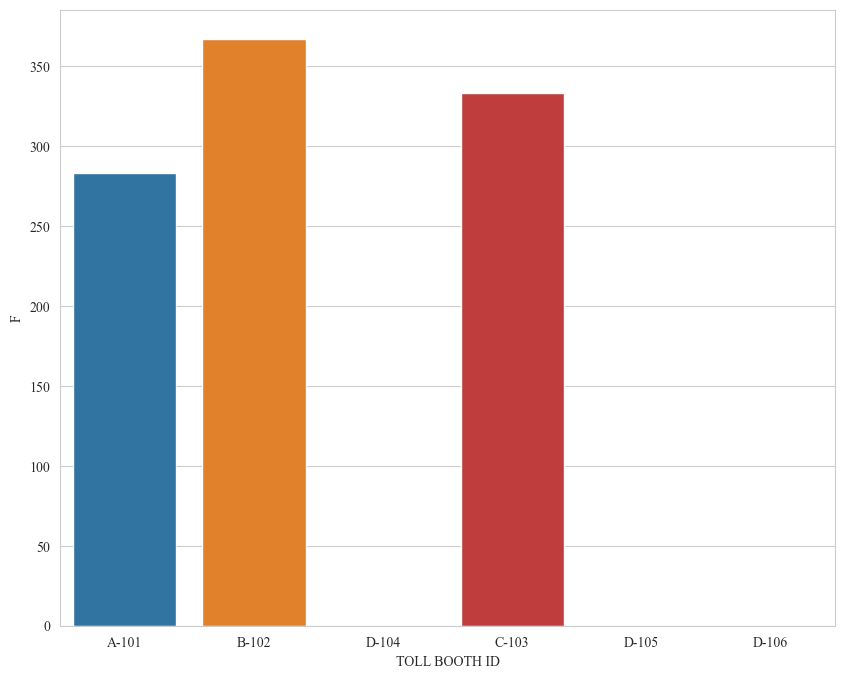

In [15]:
df["F"] = (df["FRAUD INDICATOR"] == "Fraud").astype("int")
df["Q"] = df["TIMESTAMP"].apply(lambda x : x.quarter)
for l in ["VEHICLE TYPE", "VEHICLE DIMENSIONS", "LANE TYPE", "Q", "TOLL BOOTH ID"]:
    fig, ax = plt.subplots(figsize = (10, 8), dpi = 100)
    sns.barplot(data = df, x = l, y = "F", estimator = "sum", errorbar = None)
    plt.show()

df.drop(columns = ["F", "Q"], inplace = True)

From the above plots, it seems as though some non-numerical variables do have an influence on whether or not a given transaction is fraudulent, namely, the quarter and the vehicle dimensions.

In [16]:
df.head()

,TRANSACTION ID,TIMESTAMP,VEHICLE TYPE,TOLL BOOTH ID,LANE TYPE,VEHICLE DIMENSIONS,TRANSACTION AMOUNT,AMOUNT PAID,GEOGRAPHICAL LOCATION,VEHICLE SPEED,VEHICLE PLATE NUMBER,FRAUD INDICATOR
0,1,2023-01-06 11:20:00,Bus,A-101,Express,Large,350.0,120.0,"13.059816123454882, 77.77068662374292",65.0,KA11AB1234,Fraud
1,2,2023-01-07 14:55:00,Car,B-102,Regular,Small,120.0,100.0,"13.059816123454882, 77.77068662374292",78.0,KA66CD5678,Fraud
2,3,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,0.0,0.0,"13.059816123454882, 77.77068662374292",53.0,KA88EF9012,Not Fraud
3,4,2023-01-09 02:05:00,Truck,C-103,Regular,Large,350.0,120.0,"13.059816123454882, 77.77068662374292",92.0,KA11GH3456,Fraud
4,5,2023-01-10 06:35:00,Van,B-102,Express,Medium,140.0,100.0,"13.059816123454882, 77.77068662374292",60.0,KA44IJ6789,Fraud


### **Summary**
After having imported and cleaned the dataset, the dataset then saw its variables converted to the right data types. Moreover, the numerical and non-numerical variables of the dataset were explored so as to determine any salient relationships. Ultimately, the following plausible relationships were found:
* The `TRANSACTION AMOUNT` and `AMOUNT PAID` variables, although highly correlated, were not perfectly correlated. This indicates that some transactions are either being underpaid or overpaid;
* The there seems to be a negligably small relationship between whether or not a transaction is fraudulent, and the `VEHICLE SPEED` variable, and;
* The quarter of the year in which the transaction took place, as well as the `VEHICLE DIMENSIONS` variable, seem to have an influence on whether or not a transaction is fraudulent.

## **Feature Engineering**
The Feature Engineering step is, in this project, reduced purely to the Feature Selection and Feature Creation steps. This is primarily because some of the datasets variables are either redundant, or not useful. Moreover, there seem to be several factors, not present in the dataset, which seem to influence whether or not a given transaction is fraudulent.


### **Feature Creation**
The following variables will be created and incorporated in our predictive model:
* `QUARTER`: The quarter of the year in which a transaction took place, and;
* `UNDERPAID TRANSACTION`: A flag determining whether or not a transaction has been underpaid;

The Python code to accomplish all of this is given in the code cell below:

In [17]:
# Create the new variables
df["QUARTER"] = df["TIMESTAMP"].apply(lambda x : f"Q{x.quarter}")
df["UNDERPAID TRANSACTION"] = (df["AMOUNT PAID"] < df["TRANSACTION AMOUNT"]).astype("int64")

# Print the first few rows of the resulting dataset
df.head()

,TRANSACTION ID,TIMESTAMP,VEHICLE TYPE,TOLL BOOTH ID,LANE TYPE,VEHICLE DIMENSIONS,TRANSACTION AMOUNT,AMOUNT PAID,GEOGRAPHICAL LOCATION,VEHICLE SPEED,VEHICLE PLATE NUMBER,FRAUD INDICATOR,QUARTER,UNDERPAID TRANSACTION
0,1,2023-01-06 11:20:00,Bus,A-101,Express,Large,350.0,120.0,"13.059816123454882, 77.77068662374292",65.0,KA11AB1234,Fraud,Q1,1
1,2,2023-01-07 14:55:00,Car,B-102,Regular,Small,120.0,100.0,"13.059816123454882, 77.77068662374292",78.0,KA66CD5678,Fraud,Q1,1
2,3,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,0.0,0.0,"13.059816123454882, 77.77068662374292",53.0,KA88EF9012,Not Fraud,Q1,0
3,4,2023-01-09 02:05:00,Truck,C-103,Regular,Large,350.0,120.0,"13.059816123454882, 77.77068662374292",92.0,KA11GH3456,Fraud,Q1,1
4,5,2023-01-10 06:35:00,Van,B-102,Express,Medium,140.0,100.0,"13.059816123454882, 77.77068662374292",60.0,KA44IJ6789,Fraud,Q1,1


### **Feature Selection**
The following features will be removed, because they have been deemed not strong predictors of whether or not a transaction is fraudulent:
* `TRANSACTION ID`: This is because it is a unique identifier for rows in the dataset, and is not directly related to the `FRAUD INDICATOR` column;
* `TIMESTAMP`: This is because it shall be replace with the `QUARTER` variable, which has been deemed a stronger predictor of the `FRAUD INDICATOR` column;
* `TRANSACTION AMOUNT`: This is because it shall be replace with the `UNDERPAID TRANSACTION` variable, which has been deemed a stronger predictor of the `FRAUD INDICATOR` column;
* `AMOUNT PAID`: This is because it shall be replace with the `UNDERPAID TRANSACTION` variable, which has been deemed a stronger predictor of the `FRAUD INDICATOR` column;
* `GEOGRAPHICAL LOCATION`: This is because it shall be replaced with the `TOLL BOOTH ID` variable and;
* `VEHICLE PLATE NUMBER`: This is because incorporating this variable may result in overfitting.

In [18]:
# Drop the redundant features
df.drop(columns = ["TRANSACTION ID", "TIMESTAMP", "TRANSACTION AMOUNT", "AMOUNT PAID", "GEOGRAPHICAL LOCATION", "VEHICLE PLATE NUMBER"], inplace = True)

# Print the first few rows of the resulting dataset
df.head()

,VEHICLE TYPE,TOLL BOOTH ID,LANE TYPE,VEHICLE DIMENSIONS,VEHICLE SPEED,FRAUD INDICATOR,QUARTER,UNDERPAID TRANSACTION
0,Bus,A-101,Express,Large,65.0,Fraud,Q1,1
1,Car,B-102,Regular,Small,78.0,Fraud,Q1,1
2,Motorcycle,D-104,Regular,Small,53.0,Not Fraud,Q1,0
3,Truck,C-103,Regular,Large,92.0,Fraud,Q1,1
4,Van,B-102,Express,Medium,60.0,Fraud,Q1,1


## **Data Preprocessing**
Having selected the variables of interest, the dataset will now be preprocessed so as to prepare it for the implementation of our predictive model. More specifically, the categorical variables will be transformed via one-hot encoding, and the numerical variables will be standardised. This is done to ensure that all of the data is is numerical format, and that variables with larger values are not overrepresented and that variables with smaller values are not underrepresented in the model. Finally, the columns are reordered for better leggibility and the resulting data will be subjected to a train-test split. The Python code to accomplish this is given in the code cell below:

In [19]:
# Preprocess the variables
vehicle_type = pd.get_dummies(df["VEHICLE TYPE"]).astype("int64")
toll_booth_id = pd.get_dummies(df["TOLL BOOTH ID"]).astype("int64")
lane_type = pd.get_dummies(df["LANE TYPE"]).astype("int64")
vehicle_dimensions = pd.get_dummies(df["VEHICLE DIMENSIONS"]).astype("int64")
quarter = pd.get_dummies(df["QUARTER"]).astype("int64")
df.drop(columns = ["VEHICLE TYPE", "TOLL BOOTH ID", "LANE TYPE", "VEHICLE DIMENSIONS", "QUARTER"], inplace = True)
df = pd.concat(objs = [df, vehicle_type, toll_booth_id, lane_type, vehicle_dimensions, quarter], axis = 1)
df["VEHICLE SPEED"] = StandardScaler().fit_transform(X = df[["VEHICLE SPEED"]])
df["FRAUD INDICATOR"] = (df["FRAUD INDICATOR"] == "Fraud").astype("int64")
df = df.iloc[:, list(range(3, 25)) + [2, 0, 1]]
df.head()

,Bus,Car,Motorcycle,SUV,Sedan,Truck,Van,A-101,B-102,C-103,...,Large,Medium,Small,Q1,Q2,Q3,Q4,UNDERPAID TRANSACTION,VEHICLE SPEED,FRAUD INDICATOR
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,-0.171802,1
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,1,0.611525,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,-0.894872,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,1,1.455108,1
4,0,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,-0.473081,1


In [20]:
# Split the dataset into the predictor variables and the target variable
X = df[df.columns[:-1]].values
y = df["FRAUD INDICATOR"].values

# Split the dataset into the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, shuffle = True)

## **Machine Learning Model Development**
The predictive model to be developed is a voting classifier incorporating three different binary classification models:
* A logistic regression;
* A random forest classifier, and;
* A support vector machine.

The reason behind the choice of a voting classifier is to avoid overfitting the model and to increase the accuracy of the model, as well as to account for the disadvantages of each model. Moreover, the parameters for each model will be chosen via hyperparameter tuning, and the voting classifier's performance will also be checked using 5-fold cross-validation on the dataset. The Python code used to implement hyperparameter tuning is given in the code cell below.

In [21]:
model_1 = LogisticRegression()
hyperparameter_grid_1 = {
    'C': [0.1, 1, 10],
    'max_iter': [5, 10, 100],
    'tol': [1e-3, 1e-4, 1e-5]
}

model_2 = RandomForestClassifier()
hyperparameter_grid_2 = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

model_3 = SVC()
hyperparameter_grid_3 = {
    'C': [0.1, 1, 10],
    'max_iter': [5, 10, 100],
    'tol': [1e-3, 1e-4, 1e-5]
}

models = [model_1, model_2, model_3]
hyperparameter_grids = [hyperparameter_grid_1, hyperparameter_grid_2, hyperparameter_grid_3]

for model, hyperparameter_grid in zip(models, hyperparameter_grids):
    grid_search = GridSearchCV(model, hyperparameter_grid, cv = 5, scoring = "accuracy")
    grid_search.fit(X, y)
    print(f"""Model: {model} \n Best Parameters: {grid_search.best_params_} \n Accuracy Score: {grid_search.best_score_}""")

Model: LogisticRegression() 
 Best Parameters: {'C': 0.1, 'max_iter': 5, 'tol': 0.001} 
 Accuracy Score: 0.9952
Model: RandomForestClassifier() 
 Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100} 
 Accuracy Score: 0.9952
Model: SVC() 
 Best Parameters: {'C': 0.1, 'max_iter': 100, 'tol': 0.001} 
 Accuracy Score: 0.9952


The best parameters for each model are then chosen and incorporated into the voting classifier. The Python code used to accomplish this is given in the code cell below.

In [22]:
# Initialise and fit the voting classifier
model_1 = LogisticRegression(C = 0.1, max_iter = 5, tol = 0.001)
model_2 = RandomForestClassifier(max_depth = 3, max_features = "log2", min_samples_leaf = 10, min_samples_split = 10, n_estimators = 100)
model_3 = SVC(C = 0.1, max_iter = 100, tol = 0.001)
model = VotingClassifier(estimators = [("lr", model_1), ("rfc", model_2), ("svm", model_3)], voting = "hard")
model.fit_transform(X_train, y_train)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0]], dtype=int64)

Next, the voting classifier is evaluated using 5-fold cross-validation, where the accuracy, precision, recall and F1-score for each fold is recorded. The Python code used to accomplish this is given in the code cell below.

In [23]:
# Implement 5-fold cross-validation
scoring_methods = ["accuracy", "precision", "recall", "f1"]
for scoring_method in scoring_methods:
    print(f"5-Fold {scoring_method.capitalize()} Scores: {cross_val_score(estimator = model, X = X, y = y, cv = 5, scoring = scoring_method)}")

5-Fold Accuracy Scores: [0.995 0.995 0.995 0.995 0.996]
5-Fold Precision Scores: [1. 1. 1. 1. 1.]
5-Fold Recall Scores: [0.97461929 0.97461929 0.97461929 0.9744898  0.97959184]
5-Fold F1 Scores: [0.98714653 0.98714653 0.98714653 0.9870801  0.98969072]


Thus, it seems as though the model performs well for each fold. The final evaluation of the model will is implemented using Python in the code cell below.

In [24]:
# Final evaluation
scores = [accuracy_score, precision_score, recall_score, f1_score]
metrics = ["Accuracy Score", "Precision Score", "Recall Score", "F1-Score"]
y_pred = model.predict(X_test)
for score, metric in zip(scores, metrics):
    print(f"{metric}: {score(y_pred, y_test)}")

Accuracy Score: 0.993
Precision Score: 0.967741935483871
Recall Score: 1.0
F1-Score: 0.9836065573770492
